# Introduction

Do higher film budgets lead to more box office revenue? Let's find out if there's a relationship using the movie budgets and financial performance data from [the-numbers.com](https://www.the-numbers.com/movie/budgets) on **May 1st, 2018**. 

<img src=https://i.imgur.com/kq7hrEh.png>

# Import Statements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

# Notebook Presentation

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Read the Data

In [3]:
uploaded = files.upload()

Saving cost_revenue_dirty.csv to cost_revenue_dirty.csv


In [4]:
data = pd.read_csv('cost_revenue_dirty.csv')

# Explore and Clean the Data

1. How many rows and columns does the dataset contain?
2. Are there any NaN values present?
3. Are there any duplicate rows?
4. What are the data types of the columns?

In [5]:
data.shape

(5391, 6)

In [6]:
data.isna().any()

Rank                     False
Release_Date             False
Movie_Title              False
USD_Production_Budget    False
USD_Worldwide_Gross      False
USD_Domestic_Gross       False
dtype: bool

In [7]:
data.duplicated().any()

False

In [8]:
data.dtypes

Rank                      int64
Release_Date             object
Movie_Title              object
USD_Production_Budget    object
USD_Worldwide_Gross      object
USD_Domestic_Gross       object
dtype: object

### Data Type Conversions

**Challenge**: Convert the `USD_Production_Budget`, `USD_Worldwide_Gross`, and `USD_Domestic_Gross` columns to a numeric format by removing `$` signs and `,`. 
<br>
<br>
Note that *domestic* in this context refers to the United States.

In [9]:
df = data.copy()
columns = ['USD_Production_Budget', 'USD_Worldwide_Gross', 'USD_Domestic_Gross']
for column in columns:
  df[column] = df[column].replace('$', '')
df[df.columns[3:]] = df[df.columns[3:]].replace('[^.0-9\-]', '', regex=True).astype(int)
df

Rank Release_Date                     Movie_Title  \
0     5293     8/2/1915           The Birth of a Nation   
1     5140     5/9/1916                     Intolerance   
2     5230   12/24/1916    20,000 Leagues Under the Sea   
3     5299    9/17/1920  Over the Hill to the Poorhouse   
4     5222     1/1/1925                  The Big Parade   
...    ...          ...                             ...   
5386  2950    10/8/2018                             Meg   
5387   126   12/18/2018                         Aquaman   
5388    96   12/31/2020                     Singularity   
5389  1119   12/31/2020          Hannibal the Conqueror   
5390  2517   12/31/2020  Story of Bonnie and Clyde, The   

      USD_Production_Budget  USD_Worldwide_Gross  USD_Domestic_Gross  
0                    110000             11000000            10000000  
1                    385907                    0                   0  
2                    200000              8000000             8000000  
3                    100000              3000000             3000000  
4                    245000             22000000            11000000  
...                     ...                  ...                 ...  
5386               15000000                    0                   0  
5387              160000000                    0                   0  
5388              175000000                    0                   0  
5389               50000000                    0                   0  
5390               20000000                    0                   0  

[5391 rows x 6 columns]

**Challenge**: Convert the `Release_Date` column to a Pandas Datetime type. 

In [10]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rank                   5391 non-null   int64         
 1   Release_Date           5391 non-null   datetime64[ns]
 2   Movie_Title            5391 non-null   object        
 3   USD_Production_Budget  5391 non-null   int64         
 4   USD_Worldwide_Gross    5391 non-null   int64         
 5   USD_Domestic_Gross     5391 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 252.8+ KB


### Descriptive Statistics

1. What is the average production budget of the films in the data set?
2. What is the average worldwide gross revenue of films?
3. What were the minimums for worldwide and domestic revenue?
4. Are the bottom 25% of films actually profitable or do they lose money?
5. What are the highest production budget and highest worldwide gross revenue of any film?
6. How much revenue did the lowest and highest budget films make?

In [11]:
df['USD_Production_Budget'].mean()

31113737.57837136

In [12]:
df['USD_Worldwide_Gross'].mean()

88855421.96271564

In [13]:
df['USD_Worldwide_Gross'].min()

0

In [14]:
df['USD_Domestic_Gross'].min()

0

In [15]:
D = df['USD_Worldwide_Gross'] - df['USD_Production_Budget']
D.describe()

count           5,391.00
mean       57,741,684.38
std       140,972,329.93
min      -175,000,000.00
25%        -2,244,775.00
50%         8,122,000.00
75%        59,518,660.00
max     2,358,918,982.00
dtype: float64

In [16]:
df['USD_Production_Budget'].max()

425000000

In [17]:
df['USD_Worldwide_Gross'].max()

2783918982

In [18]:
df.loc[df['USD_Production_Budget'] == df['USD_Production_Budget'].min()]

Rank Release_Date        Movie_Title  USD_Production_Budget  \
2427  5391   2005-05-08  My Date With Drew                   1100   

      USD_Worldwide_Gross  USD_Domestic_Gross  
2427               181041              181041

In [19]:
df.loc[df['USD_Production_Budget'] == df['USD_Production_Budget'].max()]

Rank Release_Date Movie_Title  USD_Production_Budget  \
3529     1   2009-12-18      Avatar              425000000   

      USD_Worldwide_Gross  USD_Domestic_Gross  
3529           2783918982           760507625

# Investigating the Zero Revenue Films

How many films grossed $0 domestically (i.e., in the United States)? What were the highest budget films that grossed nothing?

In [20]:
df.where(df['USD_Domestic_Gross'] == 0).sort_values(by='USD_Production_Budget', ascending=False).head()

Rank Release_Date                         Movie_Title  \
5388  96.00   2020-12-31                         Singularity   
5387 126.00   2018-12-18                             Aquaman   
5384 321.00   2018-09-03                   A Wrinkle in Time   
5385 366.00   2018-10-08                      Amusement Park   
5090 556.00   2015-12-31  Don Gato, el inicio de la pandilla   

      USD_Production_Budget  USD_Worldwide_Gross  USD_Domestic_Gross  
5388         175,000,000.00                 0.00                0.00  
5387         160,000,000.00                 0.00                0.00  
5384         103,000,000.00                 0.00                0.00  
5385         100,000,000.00                 0.00                0.00  
5090          80,000,000.00         4,547,660.00                0.00

In [22]:
df[df['USD_Domestic_Gross'] == 0].shape[0]

512

**Challenge**: How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally?

In [25]:
df[df['USD_Worldwide_Gross'] == 0].sort_values(by='USD_Production_Budget', ascending=False).head()

Rank Release_Date        Movie_Title  USD_Production_Budget  \
5388    96   2020-12-31        Singularity              175000000   
5387   126   2018-12-18            Aquaman              160000000   
5384   321   2018-09-03  A Wrinkle in Time              103000000   
5385   366   2018-10-08     Amusement Park              100000000   
5058   880   2015-11-12   The Ridiculous 6               60000000   

      USD_Worldwide_Gross  USD_Domestic_Gross  
5388                    0                   0  
5387                    0                   0  
5384                    0                   0  
5385                    0                   0  
5058                    0                   0

In [26]:
df[df['USD_Worldwide_Gross'] == 0].shape[0]

357

### Filtering on Multiple Conditions

What are international releases that had some worldwide gross revenue, but made zero revenue in the United States?

In [32]:
df_world = df.query('USD_Worldwide_Gross > 0 and USD_Domestic_Gross == 0')
df_world.sort_values(by='USD_Worldwide_Gross', ascending=False)

Rank Release_Date                             Movie_Title  \
2836  1270   2006-12-31         Les Bronzés 3: amis pour la vie   
4960  3283   2015-08-05                       La famille Bélier   
3809  2154   2010-12-31  Sammy's avonturen: De geheime doorgang   
3769  2776   2010-11-05                                Haeundae   
3051  2665   2007-12-31                                  Taxi 4   
...    ...          ...                                     ...   
5141  4076   2016-02-09                             Yoga Hosers   
3573  5015   2010-01-26                                  B-Girl   
5103  4625   2015-12-31             To Be Frank, Sinatra at 100   
4772  5005   2014-12-31                                 Destiny   
5061  4927   2015-11-12                           American Hero   

      USD_Production_Budget  USD_Worldwide_Gross  USD_Domestic_Gross  
2836               42000000             83833602                   0  
4960               11000000             74056184                   0  
3809               25000000             71594792                   0  
3769               16000000             64733391                   0  
3051               17500000             60865364                   0  
...                     ...                  ...                 ...  
5141                5000000                 2199                   0  
3573                 700000                 1160                   0  
5103                2000000                  926                   0  
4772                 750000                  450                   0  
5061                1000000                   26                   0  

[155 rows x 6 columns]

### Unreleased Films

* Which films were not released yet as of the time of data collection (May 1st, 2018)?
* How many films are included in the dataset that have not yet had a chance to be screened in the box office? 

In [35]:
border_date = pd.Timestamp('2018-5-1')
data_clean = df[df['Release_Date'] < border_date]
data_clean

Rank Release_Date                       Movie_Title  \
0     5293   1915-08-02             The Birth of a Nation   
1     5140   1916-05-09                       Intolerance   
2     5230   1916-12-24      20,000 Leagues Under the Sea   
3     5299   1920-09-17    Over the Hill to the Poorhouse   
4     5222   1925-01-01                    The Big Parade   
...    ...          ...                               ...   
5379  1295   2017-10-02            John Wick: Chapter Two   
5380    70   2017-10-03                Kong: Skull Island   
5381    94   2017-12-05  King Arthur: Legend of the Sword   
5382  1254   2017-12-05                          Snatched   
5383  2521   2017-12-31                The Thousand Miles   

      USD_Production_Budget  USD_Worldwide_Gross  USD_Domestic_Gross  
0                    110000             11000000            10000000  
1                    385907                    0                   0  
2                    200000              8000000             8000000  
3                    100000              3000000             3000000  
4                    245000             22000000            11000000  
...                     ...                  ...                 ...  
5379               40000000            166893990            92029184  
5380              185000000            561137727           168052812  
5381              175000000            140012608            39175066  
5382               42000000             57850343            45850343  
5383               20000000                    0                   0  

[5384 rows x 6 columns]

In [34]:
data_future = df[df['Release_Date'] >= border_date]
data_future.shape[0]

7

### Films that Lost Money

What is the percentage of films where the production costs exceeded the worldwide gross revenue? 

In [39]:
df_lost = data_clean.query('USD_Production_Budget > USD_Worldwide_Gross')
len(df_lost)/len(data_clean)

0.37277117384843983

# Seaborn for Data Viz: Bubble Charts

In [38]:
import seaborn as sns

### Plotting Movie Releases over Time


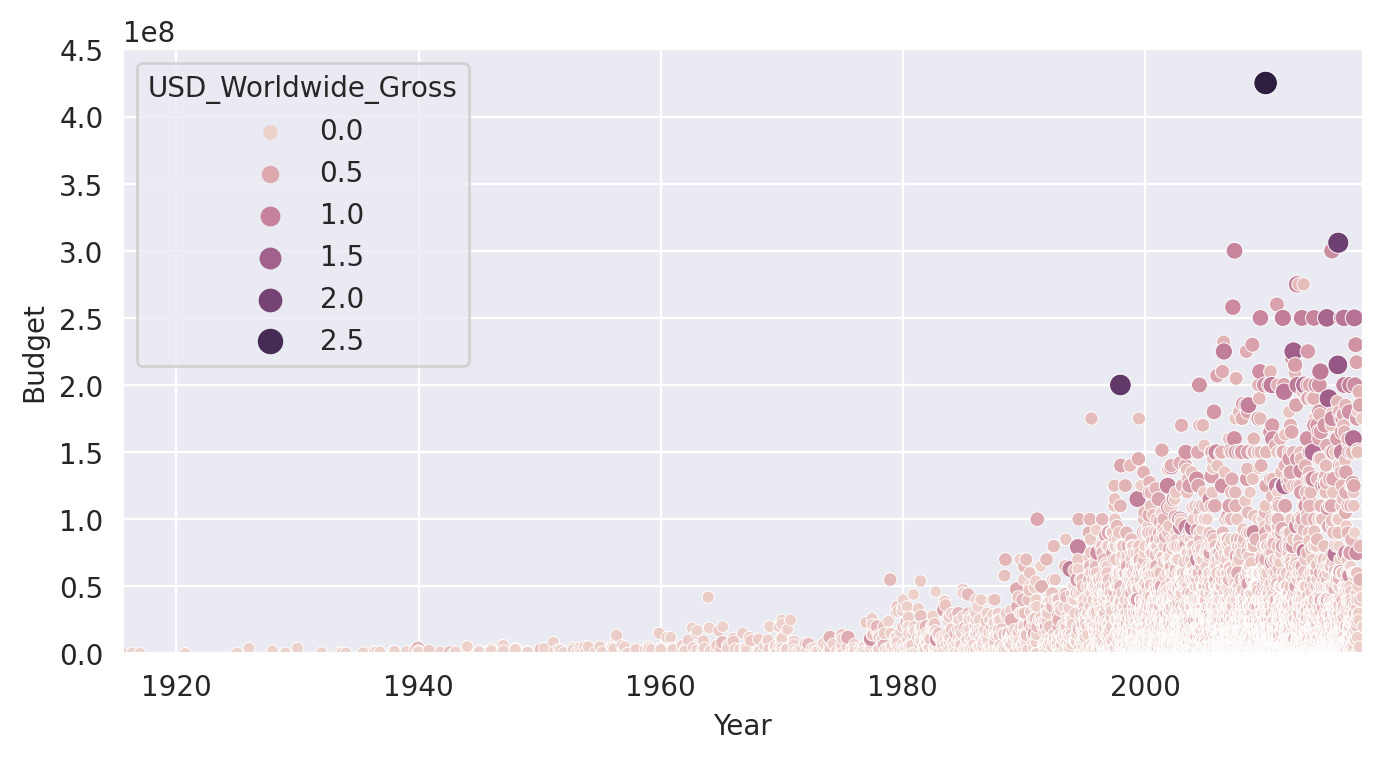

In [40]:
plt.figure(figsize=(8,4), dpi=200)

with sns.axes_style('darkgrid'):
  ax = sns.scatterplot(data=data_clean,
                      x='Release_Date',
                      y='USD_Production_Budget',
                      hue='USD_Worldwide_Gross',
                      size='USD_Worldwide_Gross')

  ax.set(xlabel='Year',
        ylabel='Budget',
        xlim=(data_clean.Release_Date.min(), data_clean.Release_Date.max()),
        ylim=(0, 450000000))


# Converting Years to Decades

In [42]:
dates = pd.DatetimeIndex(data=data_clean.Release_Date)
decades = dates.year // 10 * 10
data_clean['Decades'] = decades
data_clean

<ipython-input-42-376e3ddfc8ca>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['Decades'] = decades


Rank Release_Date                       Movie_Title  \
0     5293   1915-08-02             The Birth of a Nation   
1     5140   1916-05-09                       Intolerance   
2     5230   1916-12-24      20,000 Leagues Under the Sea   
3     5299   1920-09-17    Over the Hill to the Poorhouse   
4     5222   1925-01-01                    The Big Parade   
...    ...          ...                               ...   
5379  1295   2017-10-02            John Wick: Chapter Two   
5380    70   2017-10-03                Kong: Skull Island   
5381    94   2017-12-05  King Arthur: Legend of the Sword   
5382  1254   2017-12-05                          Snatched   
5383  2521   2017-12-31                The Thousand Miles   

      USD_Production_Budget  USD_Worldwide_Gross  USD_Domestic_Gross  Decades  
0                    110000             11000000            10000000     1910  
1                    385907                    0                   0     1910  
2                    200000              8000000             8000000     1910  
3                    100000              3000000             3000000     1920  
4                    245000             22000000            11000000     1920  
...                     ...                  ...                 ...      ...  
5379               40000000            166893990            92029184     2010  
5380              185000000            561137727           168052812     2010  
5381              175000000            140012608            39175066     2010  
5382               42000000             57850343            45850343     2010  
5383               20000000                    0                   0     2010  

[5384 rows x 7 columns]

### Separate the "old" (before 1969) and "New" (1970s onwards) Films

* `old_films` should include all the films before 1969 (up to and including 1969)
* `new_films` should include all the films from 1970 onwards
* How many films were released prior to 1970?
* What was the most expensive film made prior to 1970?

In [43]:
old_films = data_clean[data_clean.Decades < 1970]
new_films = data_clean[data_clean.Decades >= 1970]
print(len(old_films))
old_films[old_films.USD_Production_Budget == old_films.USD_Production_Budget.max()]

153


Rank Release_Date Movie_Title  USD_Production_Budget  \
109  1253   1963-12-06   Cleopatra               42000000   

     USD_Worldwide_Gross  USD_Domestic_Gross  Decades  
109             71000000            57000000     1960

# Seaborn Regression Plots

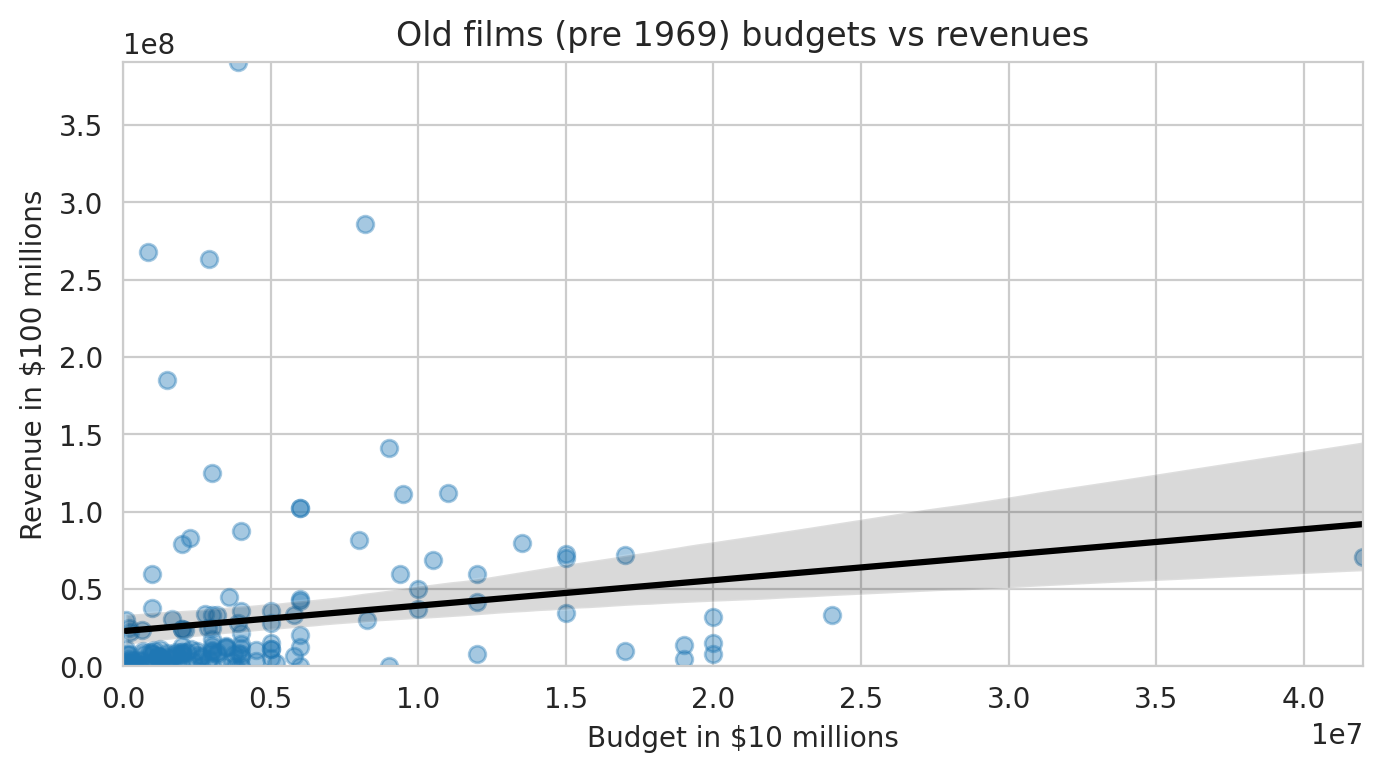

In [47]:
plt.figure(figsize=(8,4), dpi=200)

with sns.axes_style('whitegrid'):
  ax = sns.regplot(data=old_films, x='USD_Production_Budget', 
                   y='USD_Worldwide_Gross',
                   scatter_kws = {'alpha': 0.4},
                   line_kws = {'color': 'black'})
  ax.set(xlabel='Budget in $10 millions',
         ylabel='Revenue in $100 millions',
         xlim=(0, old_films.USD_Production_Budget.max()),
         ylim=(0, old_films.USD_Worldwide_Gross.max()),
         title='Old films (pre 1969) budgets vs revenues')

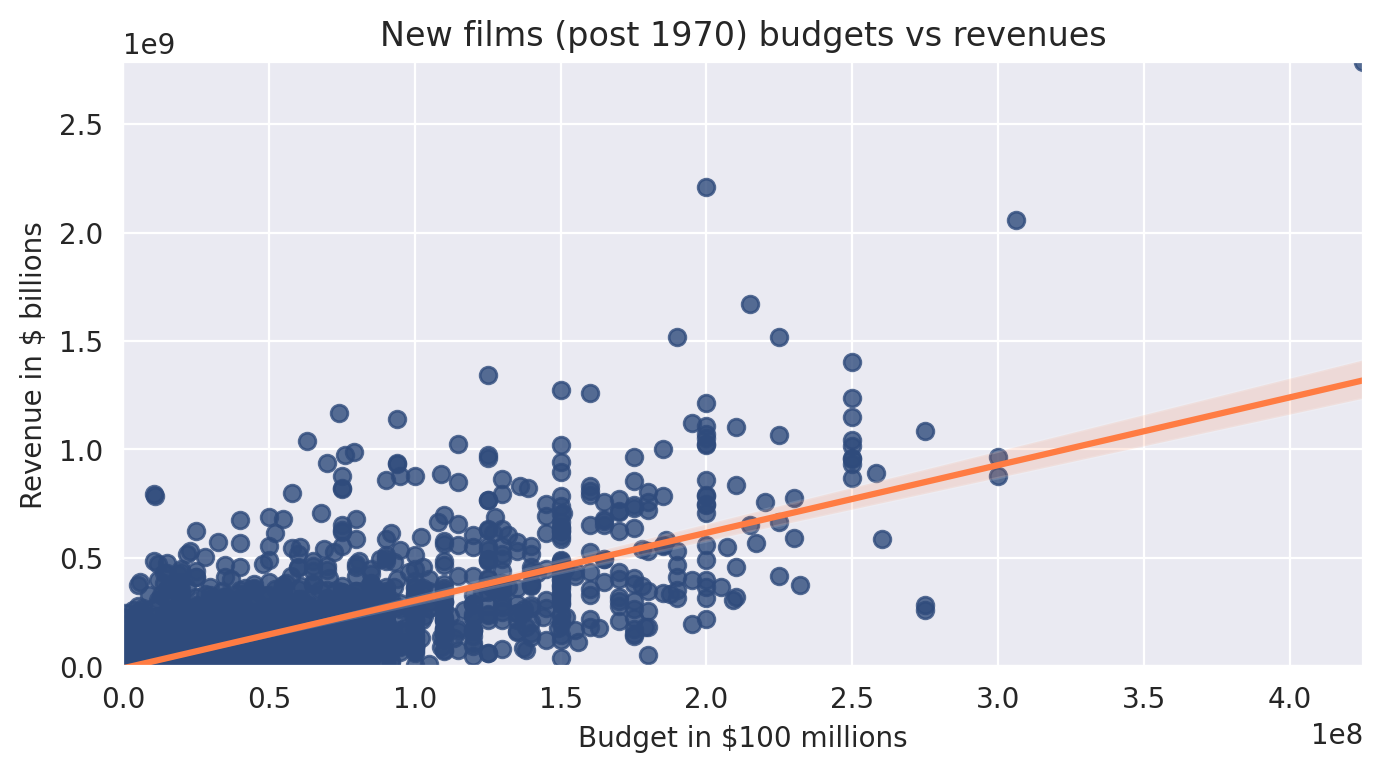

In [48]:
plt.figure(figsize=(8,4), dpi=200)

with sns.axes_style('darkgrid'):
  ax = sns.regplot(data=new_films,
                   x='USD_Production_Budget',
                   y='USD_Worldwide_Gross',
                   scatter_kws = {'color': '#2f4b7c'},
                   line_kws = {'color': '#ff7c43'})
  ax.set(xlabel='Budget in $100 millions',
         ylabel='Revenue in $ billions',
         xlim=(0, new_films.USD_Production_Budget.max()),
         ylim=(0, new_films.USD_Worldwide_Gross.max()),
         title='New films (post 1970) budgets vs revenues')

# Regression with scikit-learn

In [49]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

X = pd.DataFrame(new_films, columns=['USD_Production_Budget'])
y = pd.DataFrame(new_films, columns=['USD_Worldwide_Gross'])

regression.fit(X, y)
regression.score(X, y)

0.5577032617720403

In [50]:
old_regression = LinearRegression()

X_old = pd.DataFrame(old_films, columns=['USD_Production_Budget'])
y_old = pd.DataFrame(old_films, columns=['USD_Worldwide_Gross'])

old_regression.fit(X_old, y_old)
old_regression.score(X_old, y_old)

0.02937258620576877

# Using Model to Make a Prediction

How much global revenue does our model estimate for a film with a budget of $350 million? 

In [51]:
revenue = regression.intercept_ + regression.coef_ * 350000000
revenue[0][0]

1084257803.0557723

In [56]:
y_pred = regression.predict([[350000000]])
print(y_pred[0][0])

1084257803.0557723


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
